## Infinite

In [67]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

infinite_q_table = np.load('infinite_q_table.npy')
infinite_q_table_no_ace = np.zeros([19,2])
infinite_q_table_ace = np.zeros([19,2])


for index_s, state in enumerate(infinite_q_table): 
    for index_a, ace in enumerate(state): 
        if index_a == 1: 
            infinite_q_table_ace[index_s][0] = ace[0]
            infinite_q_table_ace[index_s][1] = ace[1]
            
        else: 
            infinite_q_table_no_ace[index_s][0] = ace[0]
            infinite_q_table_no_ace[index_s][1] = ace[1]


q_table_no_ace_df = pd.DataFrame(infinite_q_table_no_ace, columns=['stick NA', 'hit NA'], index=np.arange(2,21))
q_table_ace_df = pd.DataFrame(infinite_q_table_ace, columns=['stick A', 'hit A'], index=np.arange(2,21))

q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)
q_table

,stick NA,hit NA,stick A,hit A
2,0.332012,0.0,0.0,0.0
3,9.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0
10,0.000000,0.0,0.0,0.0
11,0.000000,0.0,0.0,0.0


In [68]:
track = np.load('trackerson_the_2nd.npy')
print(track.shape)

tracker_infinite = np.zeros([19,2])

for index_s, state in enumerate(track): 
    for index_p, ace in enumerate(state): 
            tracker_infinite[index_s][index_p] = ace
               
tracker_infinite_df = pd.DataFrame(tracker_infinite, columns=['no ace', 'ace'], index=np.arange(2,21))
tracker_infinite_df

(19, 2)


,no ace,ace
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0
10,0.0,0.0
11,0.0,0.0


(19, 2)


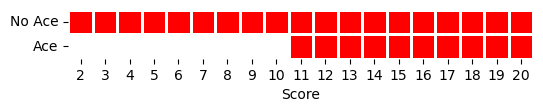

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

infinite_q_policy = np.load('infinite_policy.npy')
print(infinite_q_policy.shape)
policy_df = pd.DataFrame(infinite_q_policy, columns=['No Ace', 'Ace'], index=np.arange(2,21))


fig, ax = plt.subplots(1, 1, figsize=(6, 1))  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask1 = np.full_like(infinite_q_policy.T, False, dtype=bool)
mask1[1,0:9] = True

sns.heatmap(infinite_q_policy.T, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            linecolor='white', linewidths=1,
            ax=ax, cbar=False,
            square=True,
            mask=mask1)

ax.set_xlabel('Score')
ax.set_yticklabels(('No Ace', 'Ace'))
ax.set_xticklabels(('2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'))
ax.tick_params('y', rotation=0)

plt.show()

## Finite

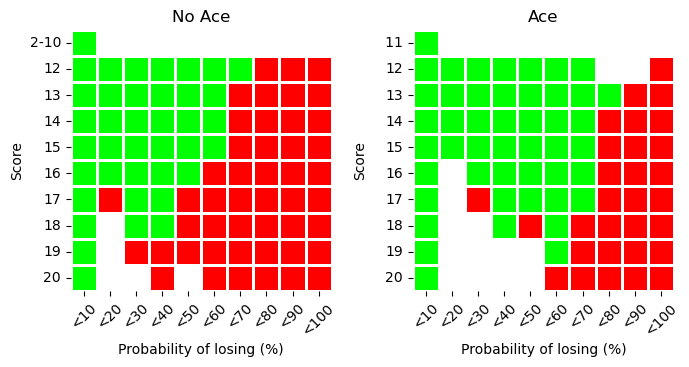

In [70]:
finite_q_policy = np.load('finite_policy.npy')
finite_q_policy_noace = np.zeros([19,10])
finite_q_policy_ace = np.zeros([19,10])
for index_s, state in enumerate(finite_q_policy): 
    for index_p, percentage in enumerate(state): 
        finite_q_policy_noace[index_s][index_p] = percentage[0]
        finite_q_policy_ace[index_s][index_p] = percentage[1]

finite_q_policy_noace = np.delete(finite_q_policy_noace,(0,1,2,3,4,5,6,7,8) ,axis=0)
finite_q_policy_ace = np.delete(finite_q_policy_ace,(0,1,2,3,4,5,6,7,8) ,axis=0)

q_policy_noace_df = pd.DataFrame(finite_q_policy_noace, columns=np.arange(0,10), index=np.arange(11,21))
#q_policy_noace_df.iloc[0:10,1:10]= 3
q_policy_ace_df = pd.DataFrame(finite_q_policy_ace, columns=np.arange(0,10), index=np.arange(11,21))


fig, ax = plt.subplots( 1,2, figsize=(7, 7))  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask2 = np.full_like(q_policy_noace_df, False, dtype=bool)
for index, row in q_policy_noace_df.iterrows():
    for i, value in enumerate(row):
        if value == 2:
            mask2[index-11][i] = True

sns.heatmap(q_policy_noace_df, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[0], cbar=False,
            mask=mask2)

ax[0].set_xlabel('Probability of losing (%)')
ax[0].set_ylabel('Score')
ax[0].tick_params('y', rotation=0)
ax[0].set_yticklabels(('2-10','12','13','14','15','16','17','18','19','20'))
ax[0].set_xticklabels(('<10','<20','<30','<40','<50','<60','<70','<80','<90','<100'))
ax[0].tick_params('x', rotation=45)
ax[0].set_title('No Ace')

mask3 = np.full_like(q_policy_ace_df, False, dtype=bool)
for index, row in q_policy_ace_df.iterrows():
    for i, value in enumerate(row):
        if value == 2:
            mask3[index-11][i] = True

sns.heatmap(q_policy_ace_df, cmap=cmap,
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[1], cbar=False,
            mask=mask3)

ax[1].set_xlabel('Probability of losing (%)')
ax[1].set_ylabel('Score')
ax[1].tick_params('y', rotation=0)
ax[1].set_yticklabels(('   11','12','13','14','15','16','17','18','19','20'))
ax[1].set_xticklabels(('<10','<20','<30','<40','<50','<60','<70','<80','<90','<100'))
ax[1].tick_params('x', rotation=45)
ax[1].set_title('Ace')

fig.tight_layout()
plt.show()

In [71]:
finite_q_table = np.load('finite_q_table.npy')

finite_q_table_noace_hit = np.zeros([19,10])
finite_q_table_noace_stick = np.zeros([19,10])
finite_q_table_ace_hit = np.zeros([19,10])
finite_q_table_ace_stick = np.zeros([19,10])
for index_s, state in enumerate(finite_q_table): 
    for index_p, percentage in enumerate(state): 
        finite_q_table_noace_stick[index_s][index_p] = percentage[0,0] 
        finite_q_table_noace_hit[index_s][index_p] = percentage[0,1]
        finite_q_table_ace_stick[index_s][index_p] = percentage[1,0]
        finite_q_table_ace_hit[index_s][index_p] = percentage[1,1]

finite_q_table_noace_stick = np.array([f"{x:10.2f}" for x in finite_q_table_noace_stick.ravel()]).reshape(finite_q_table_noace_stick.shape)
finite_q_table_noace_hit = np.array([f"{x:10.2f}" for x in finite_q_table_noace_hit.ravel()]).reshape(finite_q_table_noace_hit.shape)
finite_q_table_ace_stick = np.array([f"{x:10.2f}" for x in finite_q_table_ace_stick.ravel()]).reshape(finite_q_table_ace_stick.shape)
finite_q_table_ace_hit = np.array([f"{x:10.2f}" for x in finite_q_table_ace_hit.ravel()]).reshape(finite_q_table_ace_hit.shape)

print("finite_q_table_noace_stick")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_noace_stick]))
print("finite_q_table_noace_hit")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_noace_hit]))
print("finite_q_table_ace_stick")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_ace_stick]))
print("finite_q_table_ace_hit")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_ace_hit]))

finite_q_table_noace_stick
      4.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
      9.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     16.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     25.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     36.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     49.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     64.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     81.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
    100.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00      

In [72]:
mux = pd.MultiIndex.from_product([[0,1,2,3,4,5,6,7,8,9], ['Hit', 'Stick']])

q_finite_values = np.load('finite_q_table.npy')


q_finite_no_ace = np.zeros([19,20])
q_finite_ace = np.zeros([19,20])


for index_s, state in enumerate(q_finite_values): #19
    
    for index_p, percentage in enumerate(state): #10

        i_1 = 0
        i_2 = 0 
        for index_a, ace in enumerate(state): # 2

            if index_a == 1: 
                
                q_finite_ace[index_s][i_1] = ace[1][0]
                i_1 += 1
                q_finite_ace[index_s][i_1] = ace[1][1]
                i_1 += 1
            else: 
                q_finite_no_ace[index_s][i_2] = ace[0][0]
                i_2 += 1 
                q_finite_no_ace[index_s][i_2] = ace[0][1]
                i_2 += 1
          
print(q_finite_no_ace.shape)


# q_table_no_ace_df = pd.DataFrame(q_table_no_ace, columns=mux, index=np.arange(2,21))
# q_table_ace_df = pd.DataFrame(q_table_ace, columns=mux, index=np.arange(2,21))

# q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)

# Create a MultiIndex for the columns
columns = pd.MultiIndex.from_product([range(10), ['stick', 'hit']],
                                     names=['%', 'action'])

# Reshape the numpy array into 19 rows and 20 columns (10 columns * 2 subcolumns)
#reshaped_data = q_finite_no_ace.reshape((19,20))


# Create the DataFrame
df = pd.DataFrame(q_finite_no_ace, columns=columns, index=np.arange(2,21))
df

(19, 20)


%           0                        1                       2              \
action  stick          hit       stick         hit       stick         hit   
2         4.0  1140.643496    0.000000    0.000000    0.000000    0.000000   
3         9.0  1143.085989    0.000000    0.000000    0.000000    0.000000   
4        16.0  1144.077159    0.000000    0.000000    0.000000    0.000000   
5        25.0  1147.072435    0.000000    0.000000    0.000000    0.000000   
6        36.0  1141.706076    0.000000    0.000000    0.000000    0.000000   
7        49.0  1130.089711    0.000000    0.000000    0.000000    0.000000   
8        64.0  1107.651372    0.000000    0.000000    0.000000    0.000000   
9        81.0  1069.048070    0.000000    0.000000    0.000000    0.000000   
10      100.0   990.966684    0.000000    0.000000    0.000000    0.000000   
11      121.0   875.329788    0.000000    0.000000    0.000000    0.000000   
12      144.0   994.941037  144.000000  517.276973  144.000000  413.021639   
13      169.0   989.906336  169.000000  513.550036  169.000000  388.222911   
14      196.0   970.203677  196.000000  518.752852  196.000000  397.588047   
15      225.0   944.435161  225.000000  507.508269  225.000000  410.489489   
16      256.0   912.364984  256.000000  488.999823  256.000000  400.619106   
17      289.0   849.287471  289.000000  482.365037  289.000000  394.708890   
18      324.0   763.743041  324.000000  454.339503  324.000000  356.195069   
19      361.0   648.314422  360.999815  308.027159  361.000000  278.585015   
20      400.0   441.000000   37.747117  298.820034  399.384965  263.013520   

%                3                  4                  5                  6  \
action       stick         hit  stick         hit  stick         hit  stick   
2         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
3         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
4         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
5         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
6         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
7         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
8         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
9         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
10        0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
11        0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
12      144.000000  302.506488  144.0  259.085784  144.0  161.424958  144.0   
13      169.000000  294.564809  169.0  253.654779  169.0  153.865168  169.0   
14      196.000000  304.734127  196.0  263.299473  196.0  169.772915  196.0   
15      225.000000  302.517580  225.0  242.527279  225.0  177.897874  225.0   
16      256.000000  296.315578  256.0  241.786850  256.0  180.380917  256.0   
17      289.000000  279.489350  289.0  259.368328  289.0  166.436452  289.0   
18      324.000000  315.606919  324.0  261.112866  324.0  175.269642  324.0   
19      361.000000  246.568080  361.0  266.617625  361.0  161.888021  361.0   
20      376.838139   38.161176  400.0  226.309474  400.0  129.654892  400.0   

%                       7                 8                9       
action         hit  stick        hit  stick        hit stick  hit  
2         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
3         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
4         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
5         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
6         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
7         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
8         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
9         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
10        0.000000   

In [73]:
print(q_finite_values[10][1][0][1])


446.5567355367801


In [74]:
trackerr = np.load('trackery_mcTrackerson.npy')
print(trackerr.shape)

tracker_noace = np.zeros([19,10])
tracker_ace = np.zeros([19,10])

for index_s, state in enumerate(trackerr): 
    for index_p, percentage in enumerate(state): 
            tracker_noace[index_s][index_p] = percentage[0]
            tracker_ace[index_s][index_p] = percentage[1]

tracker_noace_df = pd.DataFrame(tracker_noace, columns=np.arange(0,10), index=np.arange(2,21))

print(tracker_noace_df)
tracker_noace_df= tracker_noace_df.to_numpy()
tracker_noace_df = np.array([f"{x:10.2f}" for x in tracker_noace_df.ravel()]).reshape(tracker_noace_df.shape)
tracker_ace_df = pd.DataFrame(tracker_ace, columns=np.arange(0,10), index=np.arange(2,21))
tracker_ace_df = tracker_ace_df.to_numpy()
tracker_ace_df = np.array([f"{x:10.2f}" for x in tracker_ace_df.ravel()]).reshape(tracker_ace_df.shape)

print('tracker_noace_df')
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in tracker_noace_df]))
print('tracker_ace_df')
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in tracker_ace_df]))


(19, 10, 2)
          0      1       2       3       4       5       6       7       8  \
2    3637.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    3584.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    3812.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5    4078.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6    4353.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7    4490.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8    4880.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9    5159.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10  16422.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11   2243.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12    111.0  136.0  1292.0  2435.0   204.0    87.0    21.0     4.0     3.0   
13     63.0   55.0   254.0  2235.0  1377.0   205.0  

Graphing average values of hands

In [75]:
import numpy as np 
import matplotlib.pyplot as plt
alpha_tracking = np.load("tracking/alpha_track_finite.npy")
plt.plot(alpha_tracking)

FileNotFoundError: [Errno 2] No such file or directory: 'tracking/alpha_track_finite.npy'

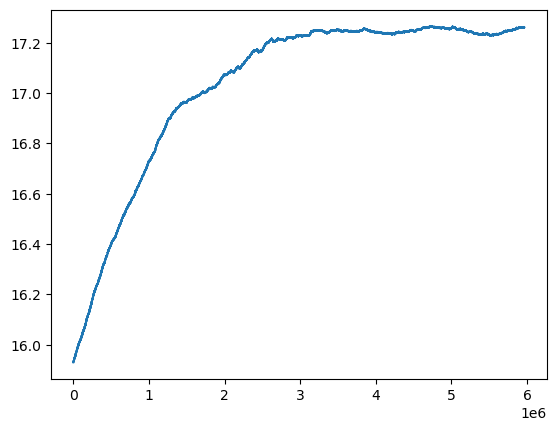

In [13]:
sumOfHand = np.load("tracking/hand_sum_track_finite.npy")
sumOfHand = np.convolve(sumOfHand, np.ones(500000)/500000, mode='valid')
plt.plot(sumOfHand)

In [11]:
def cumulative_sum_array(input_array):
    return np.cumsum(input_array)

sumOfPrevious = cumulative_sum_array(sumOfHand)


cumulativeSum = cumulative_sum_array(sumOfHand)



def create_index_plus_one_array(length):
    return np.arange(length) + 1


alpha_4 = alpha_tracking

numberOfHands = create_index_plus_one_array(len(sumOfHand))

averageValueOfHands_4 = np.divide(cumulativeSum, numberOfHands)
Value_of_hands_4 = sumOfHand

In [ ]:
#plt.plot(averageValueOfHands_1, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
# 



plt.plot(averageValueOfHands_2, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
plt.plot(averageValueOfHands_3, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.8 trained for 100000 hands')
plt.plot(averageValueOfHands_4, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
# plt.plot(averageValueOfHands_5, label='decreasing alpha 50000 with decay rate 150')

plt.legend()

plt.show()

# plt.plot(averageValueOfHands_2, label='decreasing alpha 10000 with decay rate 5')
# plt.legend()

# plt.show()

# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()


# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()



# plt.plot(alpha_5)
plt.plot(alpha_4 ,label = 'alpha with decay rate 0.01')
# plt.plot(alpha_3)
# plt.plot(alpha_2)
plt.plot(alpha_3, label = 'alpha with decay rate 0.8')
plt.plot(alpha_2, label = 'alpha with decay rate 0.2')
plt.legend()
plt.show()

NameError: name 'averageValueOfHands_2' is not defined